adapted from https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/

## Required dependencies

In [2]:
import numpy as np
import scipy as sp
from scipy.special import sph_harm

## Spherical grid

In [3]:

## first, evaluate the potential on a fine grid
# at r=10.

R = 10.
Np = 36
Nt=18
theta = -np.arccos(np.linspace(-1, 1, Nt))
phi = np.linspace(0, 2*np.pi, Np)

theta, phi = np.meshgrid(theta, phi)

x = R * np.sin(theta) * np.cos(phi) 
y = R * np.sin(theta) * np.sin(phi) 
z = R * np.cos(theta) 

## Spherical harmonics

In [4]:
m = 0
l = 1
Y01 = 1/R**2 * sph_harm(m, l, phi, theta).real

## Plotting (static)

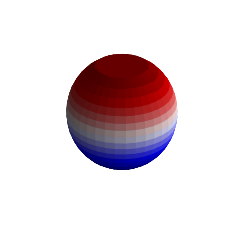

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

fmax, fmin = Y01.max(), Y01.min()
Y01 = (Y01 - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(Y01))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

## Plotting (interactive)

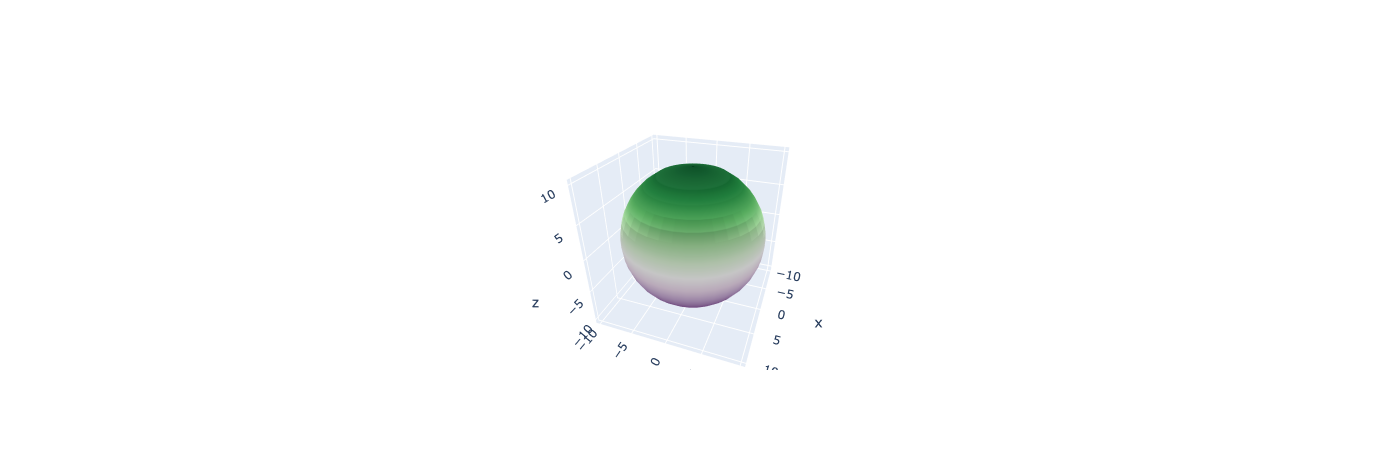

In [6]:
import plotly.graph_objects as go
import chart_studio.plotly as py

fig = go.Figure()

fig.add_trace(go.Surface(x=x, y=y, z=z, 
                surfacecolor=Y01, 
                showscale=False, 
                colorscale='PrGN'))

fig.show()

_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys304/Ylm.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys304/Ylm.py)._